/opt/miniconda3/envs/statsig/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/miniconda3/envs/statsig/lib/python3.10/site-packages/numpy/core/_methods.py:152: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/opt/miniconda3/envs/statsig/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/miniconda3/envs/statsig/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/opt/miniconda3/envs/statsig/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/miniconda3/envs/statsig/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_

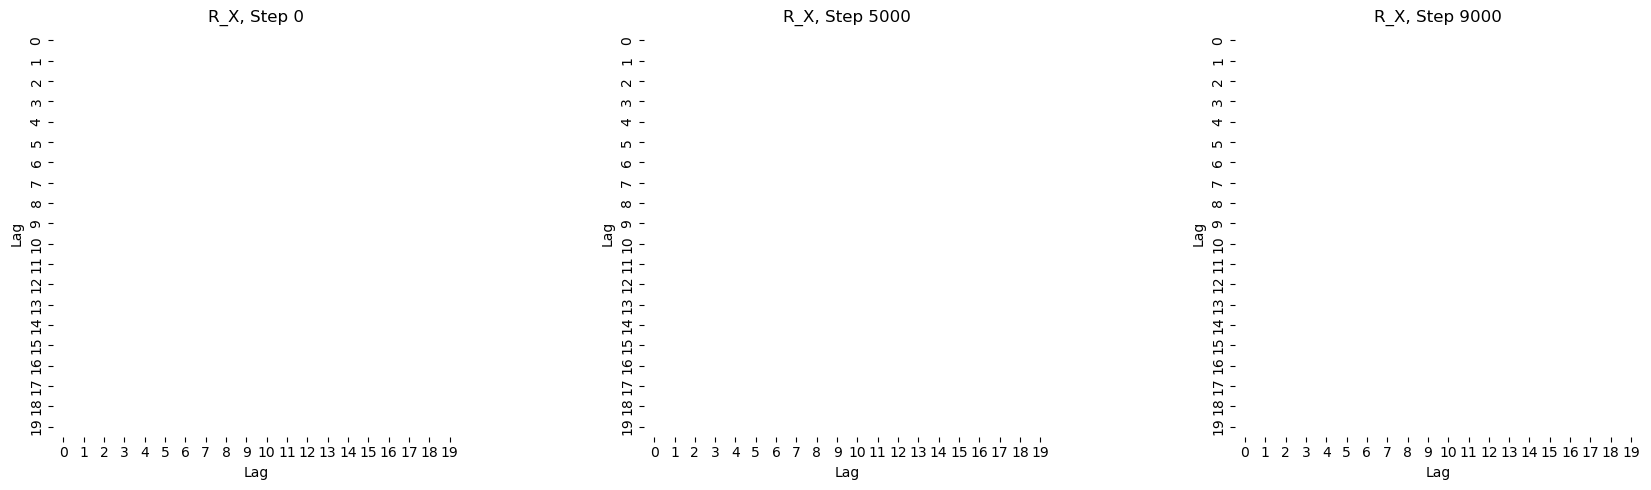

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sys
import os

# Add the parent directory (project/) to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Now you can import from synthesis.py
from synthesis import _generate_morphing_ar_noise

def create_lagged_matrix(data, lags):
    return np.column_stack([np.roll(data, -i) for i in range(lags)])

def plot_correlation_evolution_for_coeffs(coeffs_start_list, coeffs_end_list, size=10000, std=1.0, order=10, segment_length=1000, lags=20):
    assert len(coeffs_start_list) == len(coeffs_end_list), "Start and end coefficient lists must match in length"

    num_configs = len(coeffs_start_list)
    fig, axes = plt.subplots(num_configs, 3, figsize=(18, 5 * num_configs))

    if num_configs == 1:
        axes = np.expand_dims(axes, axis=0)

    for idx, (coeffs_start, coeffs_end) in enumerate(zip(coeffs_start_list, coeffs_end_list)):
        signal = _generate_morphing_ar_noise(
            mean=0.0, std=std, size=size, order=order,
            coeffs_start=coeffs_start, coeffs_end=coeffs_end
        )

        steps = [0, size // 2, size - segment_length]

        for j, step in enumerate(steps):
            segment = signal[step: step + segment_length]
            lagged_data = create_lagged_matrix(segment, lags)
            df = pd.DataFrame(lagged_data)
            corr_matrix = df.corr()

            ax = axes[idx, j]
            sns.heatmap(corr_matrix, ax=ax, cmap="coolwarm", center=0, square=True, cbar=False)
            ax.set_title(f"R_X, Step {step}")
            ax.set_xlabel("Lag")
            ax.set_ylabel("Lag")

    plt.tight_layout()
    plt.show()

# Use extreme coefficient contrast
coeffs_start_list = [
    [0.0] * 10,
]
coeffs_end_list =[
    [0.9, -0.75, 0.6, -0.4, 0.5, -0.35, 0.2, -0.15, 0.1, -0.05],
]

plot_correlation_evolution_for_coeffs(coeffs_start_list, coeffs_end_list)
